<style>
    h1 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
    }

    p {
        font-family: 'Times New Roman', Times, serif;
    }
</style>

<h1>Faktorët e performancës së studentëve</h1>

<p>Qëllimi i preprocesimit të datasetit <b>Faktorët e performancës së studentëve</b> është të strukturojë dhe pastrojë të dhënat për të lehtësuar analizën e thellë të ndikimeve në performancën akademike të studentëve. Ky proces siguron që të dhënat të jenë të pastra, të organizuara, dhe të gatshme për të zbuluar lidhjet kyçe që influencojnë suksesin e studentëve. Përmes kësaj analize të dhënash të përpunuara, mund të identifikohen dhe zbatohen strategji të efektshme arsimore që ndihmojnë në përmirësimin e arritjeve të studentëve dhe në ngritjen e cilësisë së proceseve mësimore.</p>

<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h3>Libraritë e përdorura</h3>

In [320]:
import pandas as pd
import numpy as np
from scipy import stats
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 20px;
    }
</style>
<h3>Leximi i datasetit</h3>

In [321]:
# Dataframe kryesor
main_df = pd.read_csv("../dataset/StudentPerformanceFactors.csv")

# Dataframe i preprocesuar
pre_df = pd.read_csv("../dataset/StudentPerformanceFactors_new.csv")

<style>
    h2 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 20px;
    }
</style>

<h2>1. FAZA E PARË</h2>

<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px; 
        margin-bottom: 10px; 
    }
</style>
<h3>Kualiteti i të dhënave</h3>

<style>
    h4 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h4>Struktura e datasetit </h4>

In [322]:
display(main_df.head())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


<style>
    h4 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h4>Definimi i tipeve të të dhënave</h4>

In [323]:
print("Tipet e të dhënave: \n")
print(main_df.dtypes)

# Atributet kategorike dhe numerike
categorical_columns = main_df.select_dtypes(include=['object']).columns
numerical_columns = main_df.select_dtypes(include=['int64', 'float64']).columns

print("\nAtributet kategorike:", list(categorical_columns))
print("\nAtributet numerike :", list(numerical_columns))

Tipet e të dhënave: 

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

Atributet kategorike: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disab

<style>
    h4 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h4>Menaxhimi vlerave të zbrazëta (null):</h4>


In [133]:
# Metoda për gjetjen e vlerave null
null_counts = main_df.isnull().sum()

print(null_counts)
has_nulls = main_df.isnull().any()

print('\nAtributet që kanë vlera të zbrazëta (null):', ', '.join(has_nulls[has_nulls].index))

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Atributet që kanë vlera të zbrazëta (null): Teacher_Quality, Parental_Education_Level, Distance_from_Home


<style>
    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<p>Në kodin më poshtë, kemi përpunuar të dhënat duke zëvëndësuar vlerat null me vlera të përshtatshme në varësi të tipit të atributit (kolonës). Fillimisht kemi bërë identifikimin e kolonave me vlera të zbrazëta të cilat ndahen në dy grupe: numerike dhe kategorike. Kolonat numerike zëvëndësohen me medianën për të shmangur ndikimin e outliers, ndërsa kolona të tjera numerike përdorin mesataren. Për kolonat kategorike, vlerat null zëvëndesohen me vlerën më të shpeshtë. Pas kësaj kontrollohet dataset-i për të siguruar që të gjitha vlerat <b>null</b> janë zëvëndësuar duke lejuar modifikimin direkt të të dhënave me <b>inplace=True</b> dhe duke parandaluar kopjet e padëshiruara.</p>

In [134]:
# Ndarja e kolonave në numerike dhe kategorike
numeric_cols = pre_df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = pre_df.select_dtypes(include=['object', 'category']).columns

# Për kolonat numerike vendos medianen si vlerë në Exam_Score
pre_df.fillna({'Exam_Score': pre_df['Exam_Score'].median()}, inplace=True)

# Vendos vlerën mesatare në kolonat e tjera numerike
for col in numeric_cols:
    if col != 'Exam_Score':
        pre_df.fillna({col: pre_df[col].mean()}, inplace=True)

# Për kolonat kategorike plotëso vlerat e zbrazëta me vlerën më të shpeshtë
for col in categorical_cols:
    pre_df.fillna({col: pre_df[col].mode()[0]}, inplace=True)

# Kontrollo përsëri për vlerat e zbrazëta për të konfirmuar
print("Atributet që kanë vlera null:")
print(pre_df.isnull().sum())


Atributet që kanë vlera null:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [135]:
# Lista e kolonave që duhet kontrolluar për vlera të zbrazëta
kolonat = [
    'Hours_Studied', 
    'Attendance', 
    'Parental_Involvement', 
    'Access_to_Resources', 
    'Extracurricular_Activities', 
    'Sleep_Hours', 
    'Previous_Scores', 
    'Motivation_Level', 
    'Internet_Access', 
    'Tutoring_Sessions', 
    'Family_Income', 
    'Teacher_Quality', 
    'School_Type', 
    'Peer_Influence', 
    'Physical_Activity', 
    'Learning_Disabilities', 
    'Parental_Education_Level', 
    'Distance_from_Home', 
    'Gender', 
    'Exam_Score'
]

# Largo rreshtat me vlera null në kolonat e specifikuara më lartë
pre_df.dropna(subset=kolonat, inplace=True)

# Shfaqni numrin e vlerave null që kanë mbetur në çdo kolonë
print(pre_df.isnull().sum())


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


<style>
    h4 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h4>Identifikimi i duplikimeve (duplicates)</h4>

In [136]:
# Komanda për identifikimin e duplikimeve
print("Duplikimet e gjetura: " + str(pre_df.duplicated().sum()))

Duplikimet e gjetura: 0


<style>
    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<p>Në dataset-in tonë nuk kemi gjetur ndonjë duplikat prandaj nuk ishte e nevojshme të bëjme asnjë fshirje të duplikateve. Kjo konfirmon kualitetin e të dhënave dhe na lejon të vazhdojmë me analizën e mëtejme.</p>

<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h3>Agregimi i të dhënave</h3>

In [137]:
# Agregimi sipas nivelit të arsimimit të prindërve për të vlerësuar ndikimin e ambientit arsimor në shtëpi mbi performancën e studentit
# Kjo na ndihmon të kuptojmë se si niveli arsimor i prindërve mund të ndikojë në rezultatet e provimeve të studentëve.
avg_scores_by_parental_education = pre_df.groupby('Parental_Education_Level').agg({
    'Exam_Score': 'mean'
})

# Agregimi sipas çasjes në internet dhe burime për të kuptuar ndikimin e tyre në performancën akademike
# Analizojmë se si disponueshmëria e burimeve dhe qasja në internet në shtëpi mund të ndikojnë në rezultatet e mësimit të studentëve.
avg_scores_by_access = pre_df.groupby(['Internet_Access', 'Access_to_Resources']).agg({
    'Exam_Score': 'mean'
})

print("Mesatarja e rezultateve të provimeve sipas nivelit të arsimimit të prindërve:")
print(avg_scores_by_parental_education)

print("\nMesatarja e rezultateve të provimeve sipas çasjes në internet dhe burime:")
print(avg_scores_by_access)

Mesatarja e rezultateve të provimeve sipas nivelit të arsimimit të prindërve:
                          Exam_Score
Parental_Education_Level            
College                    67.315737
High School                66.897978
Postgraduate               67.970881

Mesatarja e rezultateve të provimeve sipas çasjes në internet dhe burime:
                                     Exam_Score
Internet_Access Access_to_Resources            
No              High                  66.987179
                Low                   65.056180
                Medium                66.775591
Yes             High                  68.186916
                Low                   66.286765
                Medium                67.164111


In [201]:
# Agregimi sipas pjesëmarrjes në aktivitete jashtëkurrikulare dhe ndikimi i tyre në orët e gjumit dhe rezultatet e provimeve
# Vlerësojmë nëse angazhimi në aktivitete jashtëkurrikulare ka ndërlidhje me performancë më të mirë në provime dhe si ndikon në orët e gjumit.
avg_scores_sleep_by_activities = pre_df.groupby('Extracurricular_Activities').agg({
    'Exam_Score': 'mean',
    'Sleep_Hours': 'mean'
})

# Agregimi sipas numrit të sesioneve të mësimit për të parë ndikimin e tyre në performancën e provimeve
# Kjo analizë do të tregojë nëse ka një ndërlidhje të drejtpërdrejtë midis frekuencës së sesioneve të mësimit dhe notave më të larta në provime.
avg_scores_by_tutoring = pre_df.groupby('Tutoring_Sessions').agg({
    'Exam_Score': 'mean'
})

# Shfaqja e rezultateve

print("\nMesatarja e rezultateve të provimeve dhe orëve të gjumit sipas pjesëmarrjes në aktivitete jashtëkurrikulare:")
print(avg_scores_sleep_by_activities)

print("\nMesatarja e rezultateve të provimeve sipas sesioneve të mësimit:")
print(avg_scores_by_tutoring)


Mesatarja e rezultateve të provimeve dhe orëve të gjumit sipas pjesëmarrjes në aktivitete jashtëkurrikulare:
                            Exam_Score  Sleep_Hours
Extracurricular_Activities                         
No                           66.931435     7.026602
Yes                          67.441849     7.030726

Mesatarja e rezultateve të provimeve sipas sesioneve të mësimit:
                   Exam_Score
Tutoring_Sessions            
0                   66.489755
1                   66.980266
2                   67.567010
3                   67.894737
4                   68.229236
5                   69.067961
6                   71.666667
7                   69.857143
8                   69.000000


In [202]:
# Grupimi i të dhënave bazuar në 'Sleep_Hours' dhe llogaritja e mesatares së 'Attendance'
sleep_attendance = pre_df.groupby('Sleep_Hours')['Attendance'].mean().reset_index(name='Average_Attendance')

# Agregimi sipas cilësisë së mësuesve dhe distanca nga shtëpia për të vlerësuar ndikimin e tyre në performancën e provimeve
# Ky agregim na ndihmon të kuptojmë se si dy faktorë të rëndësishëm – cilësia e mësuesve dhe distanca nga shtëpia – ndikojnë në rezultatet e studentëve në provime.

avg_scores_by_teacher_quality_and_distance = pre_df.groupby(['Teacher_Quality', 'Distance_from_Home']).agg({
    'Exam_Score': 'mean'
})

print("\nMesatarja e rezultateve të provimeve sipas llojit të shkollës dhe cilësisë së mësuesve:")
print(sleep_attendance)

print("Mesatarja e rezultateve të provimeve sipas cilësisë së mësuesve dhe distanca nga shtëpia:")
print(avg_scores_by_teacher_quality_and_distance)


Mesatarja e rezultateve të provimeve sipas llojit të shkollës dhe cilësisë së mësuesve:
   Sleep_Hours  Average_Attendance
0            4           81.242718
1            5           80.397122
2            6           79.526163
3            7           80.142447
4            8           79.849178
5            9           79.925161
6           10           79.564103
Mesatarja e rezultateve të provimeve sipas cilësisë së mësuesve dhe distanca nga shtëpia:
                                    Exam_Score
Teacher_Quality Distance_from_Home            
High            Far                  67.015707
                Moderate             67.251678
                Near                 68.004310
Low             Far                  66.070175
                Moderate             66.412935
                Near                 67.022556
Medium          Far                  66.251220
                Moderate             66.942548
                Near                 67.324833


<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }

    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>

<h3>Mostrimi i të dhënave</h3>
<p>Mostrimi i të dhënave është procesi i zgjedhjes së një numri të vogël të elementeve nga një grup më i madh për të kryer analiza më të shpejta dhe më ekonomike, pa pasur nevojë të shikojmë të gjitha të dhënat</p>

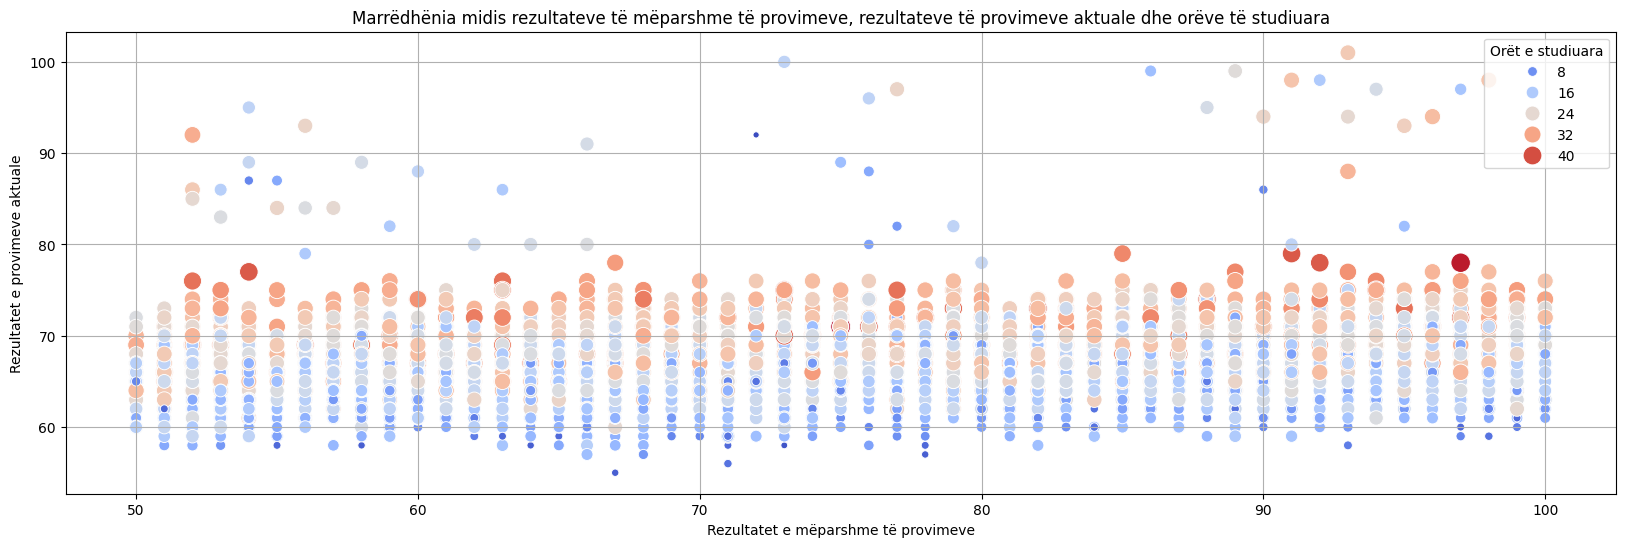

In [206]:
# Vizualizimi i marrëdhënies midis Previous Scores, Exam Score dhe Hours Studied pa mostrim

plt.figure(figsize=(20, 6))
scatter = sns.scatterplot(data=pre_df, x='Previous_Scores', y='Exam_Score', hue='Hours_Studied', palette='coolwarm', size='Hours_Studied', sizes=(20, 200))
plt.title('Marrëdhënia midis rezultateve të mëparshme të provimeve, rezultateve të provimeve aktuale dhe orëve të studiuara')
plt.xlabel('Rezultatet e mëparshme të provimeve')
plt.ylabel('Rezultatet e provimeve aktuale')
plt.legend(title='Orët e studiuara')
plt.grid(True)
plt.show()

In [207]:
# Selektimi i rreshtave të datasetit për mostrim
# sample_df = pre_df.sample(n=500)
sample_df = pre_df.sample(frac=0.1, random_state=1) 
# 10% e datasetit për mostër farc = 0.1 (rangu duhet të jetë mes 0 dhe 1) 
# random state = 1 sepse e njejta mostër e rastësishme gjenerohet çdo herë kur ekzekutohet kodi.
# Nëse random_state nuk është përcaktuar, çdo herë që ekzekutohet kodi do të rezultojë në një mostrë ndoshta të ndryshme.

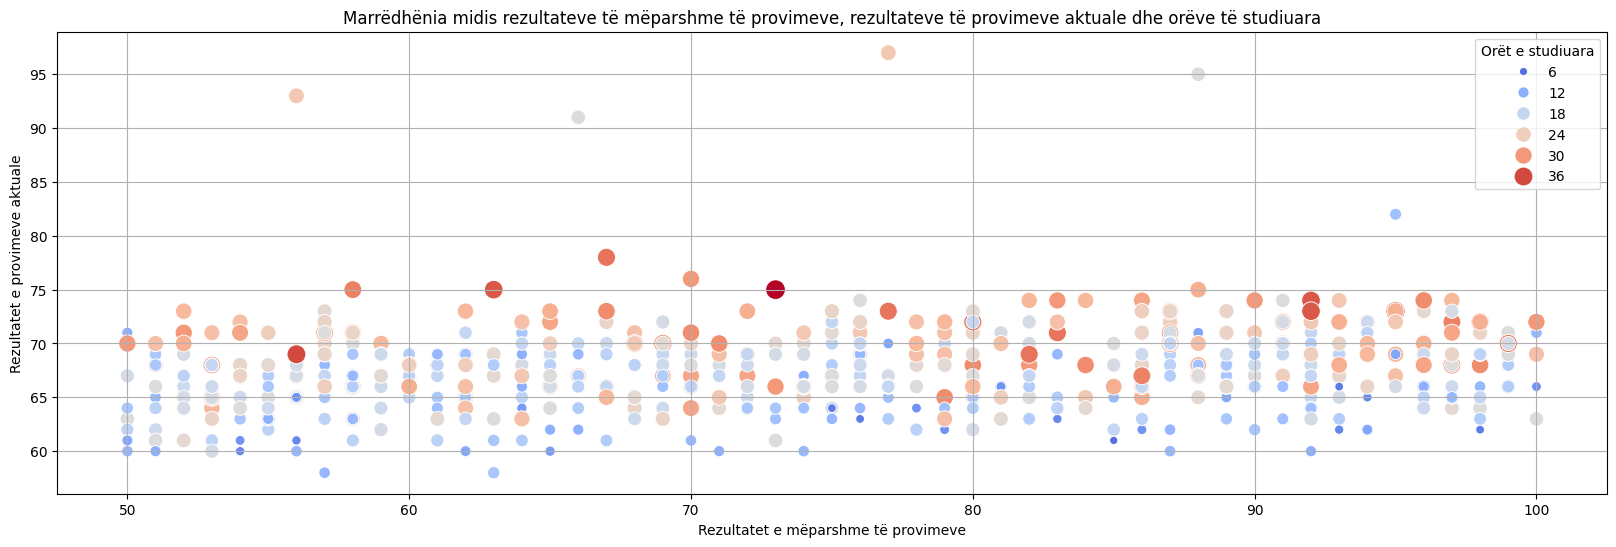

In [209]:
# Vizualizimi i marrëdhënies midis Previous Scores, Exam Score dhe Hours Studied me mostrim
plt.figure(figsize=(20, 6))
scatter = sns.scatterplot(data=sample_df, x='Previous_Scores', y='Exam_Score', hue='Hours_Studied', palette='coolwarm', size='Hours_Studied', sizes=(20, 200))
plt.title('Marrëdhënia midis rezultateve të mëparshme të provimeve, rezultateve të provimeve aktuale dhe orëve të studiuara')
plt.xlabel('Rezultatet e mëparshme të provimeve')
plt.ylabel('Rezultatet e provimeve aktuale')
plt.legend(title='Orët e studiuara')
plt.grid(True)
plt.show()

C:\Users\Lirim Islami\AppData\Local\Temp\ipykernel_15668\1428233615.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  study_exam_scores = sample_df.groupby('study_quantile')['Exam_Score'].mean().reset_index(name='Average_Exam_Score')


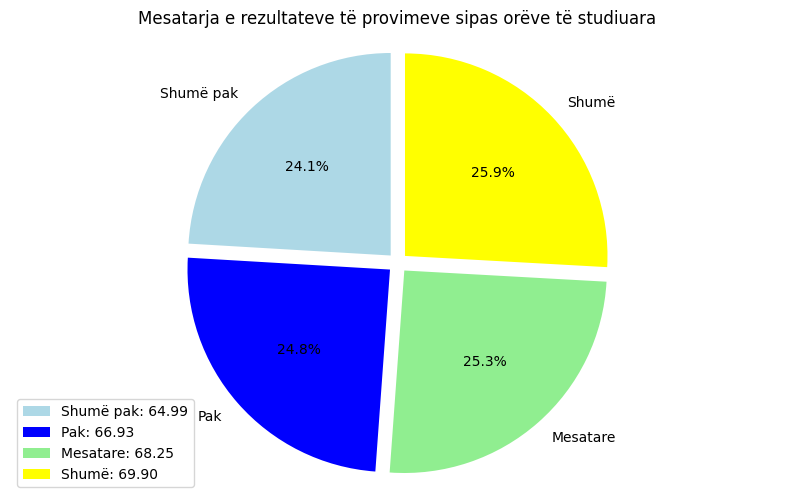

In [212]:
# Ndarja e orëve të studiuara në kuantilë
sample_df['study_quantile'] = pd.qcut(sample_df['Hours_Studied'], 4, labels=['Shumë pak', 'Pak', 'Mesatare', 'Shumë'])

# Llogaritja e mesatares së rezultateve të provimeve për secilin grup të orëve të studiuara
study_exam_scores = sample_df.groupby('study_quantile')['Exam_Score'].mean().reset_index(name='Average_Exam_Score')
sorted_scores = study_exam_scores.sort_values(by='Average_Exam_Score', ascending=True)

# Llogaritja e përqindjeve për diagram
total_scores = sorted_scores['Average_Exam_Score'].sum()
sizes = sorted_scores['Average_Exam_Score'] / total_scores * 100

# Përdorimi i një diagrami të ngjyrave për grupe të ndryshme të orëve të studiuara
colors = ['lightblue', 'blue', 'lightgreen', 'yellow']

# Vizatimi i grafikut të pie
plt.figure(figsize=(10, 6))
labels = sorted_scores['study_quantile']
explode = [0.05] * len(labels)  # Ndajmë çdo segment pak nga qendra

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('Mesatarja e rezultateve të provimeve sipas orëve të studiuara')
plt.axis('equal')
plt.legend(labels=[f'{level}: {score:.2f}' for level, score in zip(labels, sorted_scores['Average_Exam_Score'])], loc="best")
plt.show()

<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }

    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h3>Zgjedhja e nën-bashkësise të vetive</h3>

<p>Duke përdorur datasetin e ri të gjeneruar, fillojmë me përcaktimin e vetive më të rëndësishme për analizë, duke u fokusuar në ato që janë të lidhura ngushtë me <b>Exam_Score</b>.</p>

In [239]:
# Zgjedhja e nënbashkësise të vetive
features_selected = [
    'Hours_Studied', 
    'Attendance', 
    'Parental_Involvement', 
    'Access_to_Resources', 
    'Extracurricular_Activities', 
    'Sleep_Hours', 
    'Previous_Scores', 
    'Motivation_Level', 
    'Internet_Access', 
    'Tutoring_Sessions', 
    'Family_Income', 
    'Teacher_Quality', 
    'Peer_Influence', 
    'Physical_Activity', 
    'Gender'
]

# Krijojmë një dataframe të ri me vetitë e zgjedhura
df_selected_features = pre_df[features_selected + ['Exam_Score']]

# Shfaqim disa rreshta nga dataframe-i i ri
print("Dataframe me vetitë e zgjedhura:")
display(df_selected_features)

# subset_conditional_df = pre_df[(pre_df['School_Type'] == 'Public') & (pre_df['Parental_Involvement'] == 'High')]
# print(subset_conditional_df.head()) 

Dataframe me vetitë e zgjedhura:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Positive,3,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Negative,4,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Neutral,4,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Negative,4,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Neutral,4,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Positive,2,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Positive,2,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Negative,2,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Positive,3,Female,68


<style>
    h4 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }

    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>

<h4>Krijimi i vetive të reja</h4>

<p>Një prej vetive të cilat do të krijojmë është <b>Study_Rating</b> e cila është një prodhim i <b>Hours_Studied</b> dhe <b>Prevous_Scores</b>. Ky atribut do të ndihmoj për të kuptuar se sa efektive janë order e studimit në lidhje me rezultatet e meparshme.</p>

In [249]:
# Krijimi i vetive të reja
df_selected_features.loc[:, 'Study_Rating'] = df_selected_features['Hours_Studied'] * df_selected_features['Previous_Scores'] / 100

# Shfaqim disa rreshta nga dataframe-i për të kontrolluar Study_Rating
print("Dataframe pas krijimit të Study_Rating:")
display(df_selected_features[['Hours_Studied', 'Previous_Scores', 'Study_Rating']].head())

Dataframe pas krijimit të Study_Rating:


,Hours_Studied,Previous_Scores,Study_Rating
0,23,73,16.79
1,19,59,11.21
2,24,91,21.84
3,29,98,28.42
4,19,65,12.35


<style>
    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<p>Një tjetër veti e re do të jetë <b>Activity_Score</b> e cila është një shprehje për të kombinuar disa aktivitete fizike dhe jashtë shkollore. Perdorim <b>Physical_Activity</b> dhe <b>Extracurricular_Activity</b> për të krijuar këtë veti.

In [12]:
# Krijimi i Activity_Score bazuar në aktivitetet fizike dhe jashtë shkollore
df_selected_features.loc[:, 'Activity_Score'] = df_selected_features['Physical_Activity'] + df_selected_features['Extracurricular_Activities'].apply(lambda x: 1 if x == 'Yes' else 0)

# Shfaqim disa rreshta nga dataframe-i për të kontrolluar Activity_Score
print("Dataframe pas krijimit të Activity_Score:")
display(df_selected_features[['Physical_Activity', 'Extracurricular_Activities', 'Activity_Score']].head())

Dataframe pas krijimit të Activity_Score:


,Physical_Activity,Extracurricular_Activities,Activity_Score
0,3,No,3
1,4,No,4
2,4,Yes,5
3,4,Yes,5
4,4,Yes,5


<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }

    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>

<h3>Binarizimi i Sleep_Hours</h3>

<p>Krijojmë vetinë e cila tregon nëse një student ka më shumë se 7 ore gjumë, duke e binarizuar atë. Kjo mund të ndihmoj për të kuptuar ndikimin e gjumit/pushimit në performancën akademike.</p>

In [13]:
# Krijimi i dataframe-it të ri me një kopje
df_selected_features = pre_df[features_selected + ['Exam_Score']].copy()

# Binarizimi i Sleep_Hours: 0 për më pak se 7 orë, 1 për 7 orë ose më shumë
df_selected_features.loc[:, 'Sleep_Binary'] = df_selected_features['Sleep_Hours'].apply(lambda x: 1 if x >= 7 else 0)

# Shfaqim disa rreshta nga dataframe-i për të kontrolluar Sleep_Binary
print("Dataframe pas binarizimit të Sleep_Hours:")
display(df_selected_features[['Sleep_Hours', 'Sleep_Binary']].head())


Dataframe pas binarizimit të Sleep_Hours:


,Sleep_Hours,Sleep_Binary
0,7,1
1,8,1
2,7,1
3,8,1
4,6,0


<style>
    p {
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<p>Krijojmë vetinë <b>Family_Income</b> duke bërë binarizimin për të krijuar një veti që tregon nëse të ardhurat e familjes janë të larta ose të ulta. Kjo mund të bëhet duke klasifikuar <b>Family_Income</b> nëpër disa kategori <b>low, medium, high.</b>

In [14]:
# Binarizimi i Family_Income: 0 për "Low", 1 për "Medium" dhe "High"
df_selected_features.loc[:, 'Income_Binary'] = df_selected_features['Family_Income'].apply(lambda x: 1 if x in ['Medium', 'High'] else 0)

# Shfaqim disa rreshta nga dataframe-i për të kontrolluar Income_Binary
print("Dataframe pas binarizimit të Family_Income:")
display(df_selected_features[['Family_Income', 'Income_Binary']].head())


Dataframe pas binarizimit të Family_Income:


,Family_Income,Income_Binary
0,Low,0
1,Medium,1
2,Medium,1
3,Medium,1
4,Medium,1


<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h3>Kontrollimi i të dhënave të reja</h3>

In [15]:
# Shikoni strukturën e re të dataframe-it
print("Dataframe pas krijimit të vetive të reja:")
display(df_selected_features.head())

Dataframe pas krijimit të vetive të reja:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Gender,Exam_Score,Sleep_Binary,Income_Binary
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Positive,3,Male,67,1,0
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Negative,4,Female,61,1,1
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Neutral,4,Male,74,1,1
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Negative,4,Male,71,1,1
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Neutral,4,Female,70,0,1


<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>
<h3>Normalizimi</h3>

In [259]:
# Definimi i kolonave numerike
numerical_columns = pre_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Inicializimi StandardScaler
scaler = StandardScaler()

# Normalizojmë kolonat numerike
pre_df[numerical_columns] = scaler.fit_transform(pre_df[numerical_columns])

# Shfaqim disa rreshta nga dataframe pas normalizimit
print("Dataframe pas normalizimit të kolonave numerike:")
display(pre_df[numerical_columns].head())

Dataframe pas normalizimit të kolonave numerike:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,0.504942,0.348375,-0.019796,-0.143800,-1.213934,0.031411,-0.060578
1,-0.162822,-1.383736,0.661399,-1.116110,0.411451,1.001199,-1.602931
2,0.671882,1.560853,-0.019796,1.106313,0.411451,1.001199,1.738833
3,1.506587,0.781403,0.661399,1.592469,-0.401242,1.001199,0.967657
4,-0.162822,1.041220,-0.700990,-0.699406,1.224144,1.001199,0.710598


<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>

<h3>Diskretizimi</h3>

In [263]:
df_selected_features = df_selected_features.copy()

# Diskretizimi i Hours_Studied në grupe
bins_hours_studied = [0, 10, 20, 30]
labels_hours_studied = ['Low', 'Medium', 'High']
df_selected_features['Hours_Studied_Binned'] = pd.cut(
    df_selected_features['Hours_Studied'],
    bins=bins_hours_studied,
    labels=labels_hours_studied,
    right=False
)

# Diskretizimi i Sleep_Hours në grupe
bins_sleep_hours = [0, 6, 7, 8, 10]
labels_sleep_hours = ['Very Low', 'Low', 'Adequate', 'High']
df_selected_features['Sleep_Hours_Binned'] = pd.cut(
    df_selected_features['Sleep_Hours'],
    bins=bins_sleep_hours,
    labels=labels_sleep_hours,
    right=False
)

# Diskretizimi i Previous_Scores në grupe
bins_previous_scores = [0, 60, 75, 90, 100]
labels_previous_scores = ['Low', 'Medium', 'High', 'Very High']
df_selected_features['Previous_Scores_Binned'] = pd.cut(
    df_selected_features['Previous_Scores'],
    bins=bins_previous_scores,
    labels=labels_previous_scores,
    right=False
)

# Shfaqim dataframe-in e azhurnuar me grupe të reja
print("Dataframe pas diskretizimit:")
display(df_selected_features[['Hours_Studied', 'Hours_Studied_Binned', 'Sleep_Hours', 'Sleep_Hours_Binned', 'Previous_Scores', 'Previous_Scores_Binned']].head())

Dataframe pas diskretizimit:


,Hours_Studied,Hours_Studied_Binned,Sleep_Hours,Sleep_Hours_Binned,Previous_Scores,Previous_Scores_Binned
0,23,High,7,Adequate,73,Medium
1,19,Medium,8,High,59,Low
2,24,High,7,Adequate,91,Very High
3,29,High,8,High,98,Very High
4,19,Medium,6,Low,65,Medium


<style>
    h3 {
        font-weight: bold;
        font-family: 'Times New Roman', Times, serif;
        margin-top: 10px;
        margin-bottom: 10px;
    }
</style>

<h3>Transformimi</h3>

In [262]:
# Krijojmë variabla binare për kategoritë e zgjedhura 
df_transformed = pd.get_dummies(df_selected_features, columns=['Gender', 'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Internet_Access', 'Teacher_Quality', 'Peer_Influence', 'Family_Income', 'Hours_Studied_Binned', 'Sleep_Hours_Binned', 'Previous_Scores_Binned'])

# Shfaqim dataframe të transformuar
print("Dataframe pas transformimit:")
display(df_transformed.head())  

Dataframe pas transformimit:


,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Study_Value,Study_Rating,...,Hours_Studied_Binned_Medium,Hours_Studied_Binned_High,Sleep_Hours_Binned_Very Low,Sleep_Hours_Binned_Low,Sleep_Hours_Binned_Adequate,Sleep_Hours_Binned_High,Previous_Scores_Binned_Low,Previous_Scores_Binned_Medium,Previous_Scores_Binned_High,Previous_Scores_Binned_Very High
0,23,84,No,7,73,0,3,67,1679,16.79,...,False,True,False,False,True,False,False,True,False,False
1,19,64,No,8,59,2,4,61,1121,11.21,...,True,False,False,False,False,True,True,False,False,False
2,24,98,Yes,7,91,2,4,74,2184,21.84,...,False,True,False,False,True,False,False,False,False,True
3,29,89,Yes,8,98,1,4,71,2842,28.42,...,False,True,False,False,False,True,False,False,False,True
4,19,92,Yes,6,65,3,4,70,1235,12.35,...,True,False,False,True,False,False,False,True,False,False
